In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df1 = pd.read_csv("../carsdata/used_car_dataset.csv", low_memory=False)
df = df1[['horse_power', 'engine_size_ccm',
       'top_speed_km_h', 'co2_emission_g/km']]
df

,horse_power,engine_size_ccm,top_speed_km_h,co2_emission_g/km
0,120.0,NaN,NaN,NaN
1,75.0,NaN,NaN,NaN
2,508.0,NaN,NaN,NaN
3,101.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
134238,115.0,2143.0,145.0,NaN
134239,102.0,1968.0,172.0,NaN
134240,90.0,1598.0,177.0,NaN
134241,100.0,1396.0,172.0,NaN


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
horse_power,115058.0,175.590659,81.897779,3.0,123.0,164.0,191.0,796.0
engine_size_ccm,72110.0,1944.082735,673.024125,49.0,1560.0,1968.0,1998.0,8300.0
top_speed_km_h,73306.0,203.542193,27.690497,30.0,184.0,203.0,220.0,351.0
co2_emission_g/km,19262.0,159.093760,42.476167,46.0,129.0,152.0,178.0,499.0


In [101]:
df = df.dropna(axis=0, subset=['horse_power', 'engine_size_ccm', 'top_speed_km_h', 'co2_emission_g/km'], how='any')

In [102]:
# df = df[pd.notnull(df['horse_power','engine_size_ccm', 'top_speed_km_h', 'co2_emission_g/km'])]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18868 entries, 132 to 133541
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   horse_power        18868 non-null  float64
 1   engine_size_ccm    18868 non-null  float64
 2   top_speed_km_h     18868 non-null  float64
 3   co2_emission_g/km  18868 non-null  float64
dtypes: float64(4)
memory usage: 737.0 KB


In [104]:
df.head()

,horse_power,engine_size_ccm,top_speed_km_h,co2_emission_g/km
132,126.0,999.0,190.0,138.0
146,157.0,1598.0,204.0,155.0
148,245.0,1969.0,210.0,157.0
149,141.0,1968.0,158.0,206.0
150,141.0,1956.0,205.0,119.0


In [105]:
def plot_features():
    fig, axes = plt.figure(), plt.axes()

    axs = fig.add_subplot(111)

    cols = ["engine_size_ccm", "top_speed_km_h", "horse_power"]
    markers = ['s','o','*']

    for index, item in enumerate(cols):
        sns.scatterplot(data=df, y="co2_emission_g/km", x=item, marker=markers[index], label=item)
    plt.legend(loc="upper left")
    axs.set_yscale('log')
    axs.set_xscale('log')
    plt.ylabel('c02')
    plt.xlabel('explantory variables')
    return plt.show()


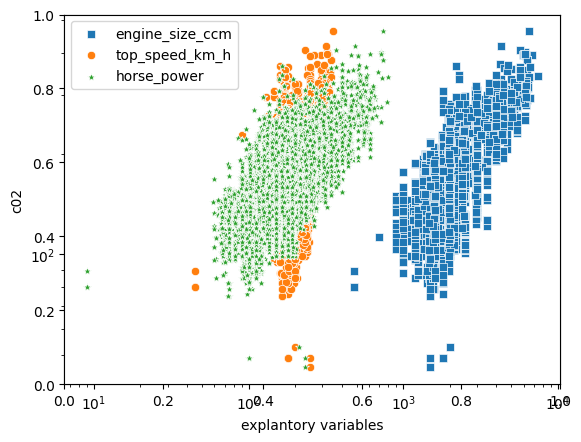

In [106]:
plot_features()

In [107]:
X,y= df.drop('co2_emission_g/km', axis=1), df['co2_emission_g/km']

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [109]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [110]:
linear_model.coef_

array([ 0.30140959,  0.02393297, -0.53348398])

In [111]:
linear_model.intercept_

167.0987961900804

In [112]:
linear_model.score(X_train, y_train)

0.5294587681564498

In [113]:
linear_model.score(X_test, y_test)

0.5055320178532079

In [114]:
y_predictions = linear_model.predict(X_test)

In [115]:
y_predictions.shape, X_test.shape

((3774,), (3774, 3))

In [116]:
y_test.shape

(3774,)

In [117]:
X_test.head()

,horse_power,engine_size_ccm,top_speed_km_h
12978,191.0,1968.0,210.0
16248,100.0,1560.0,166.0
40305,111.0,1197.0,199.0
40822,161.0,1332.0,235.0
108663,408.0,3800.0,304.0


In [118]:
y_predictions.reshape(-1,1)

array([[159.73647889],
       [146.01684929],
       [123.03971488],
       ...,
       [177.47899597],
       [126.51122253],
       [159.58592245]])

In [119]:
y_predictions[:5], y_test[:5]

(array([159.73647889, 146.01684929, 123.03971488, 122.13572209,
        218.84006849]),
 12978     154.0
 16248     109.0
 40305     114.0
 40822     145.0
 108663    240.0
 Name: co2_emission_g/km, dtype: float64)

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

In [121]:
mae, mse, rmse

(21.883403456888786, 783.1457358037519, 27.98474112447267)

In [122]:
mae_fraction = mae/y_test.mean()
mae_fraction

0.1386881557938422

In [123]:
rmse/y_test.mean()

0.1773559649698567

In [124]:
y_predictions[:5], y_test[:5]

(array([159.73647889, 146.01684929, 123.03971488, 122.13572209,
        218.84006849]),
 12978     154.0
 16248     109.0
 40305     114.0
 40822     145.0
 108663    240.0
 Name: co2_emission_g/km, dtype: float64)

Text(0.5, 0, 'Sample number')

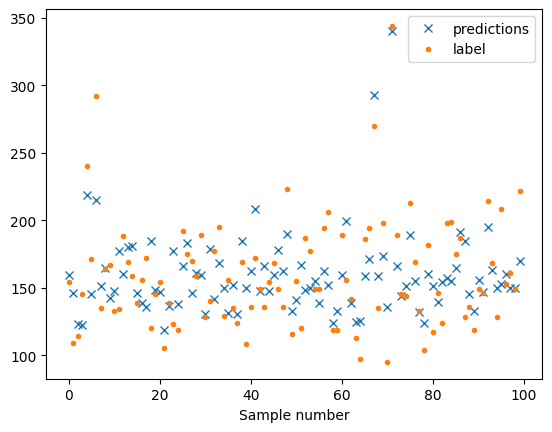

In [125]:

samples = 100
plt.plot(range(samples), y_predictions[:samples], 'x')
plt.plot(range(samples), y_test[:samples], '.')
plt.legend(["predictions","label"])
plt.xlabel("Sample number")

## Choosing a degree of polynomial for a polynomial regression

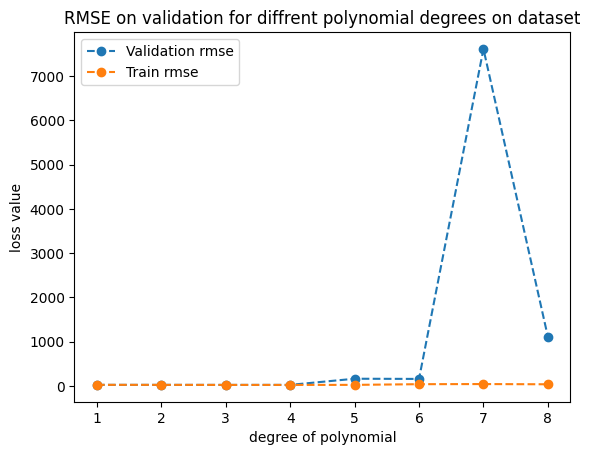

In [132]:
from sklearn.preprocessing import PolynomialFeatures
degrees = [1,2,3,4,5,6,7,8]
rmse_train = []
rmse_val = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for degree in degrees:   
    model_polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    train_features = model_polynomial.fit_transform(X_train)
    val_features = model_polynomial.transform(X_val)
    model_linear_reg = LinearRegression()
    model_linear_reg.fit(train_features, y_train)
    y_pred_train = model_linear_reg.predict(train_features)
    y_pred_val = model_linear_reg.predict(val_features)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

fig, axes =plt.figure(), plt.axes()
axes.plot(range(1,9), rmse_val, label="Validation rmse",marker='o', linestyle='dashed')
axes.plot(range(1,9), rmse_train, label="Train rmse", marker='o', linestyle='dashed')
plt.title("RMSE on validation for diffrent polynomial degrees on dataset")
plt.xlabel('degree of polynomial')
plt.ylabel('loss value')
plt.legend();

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

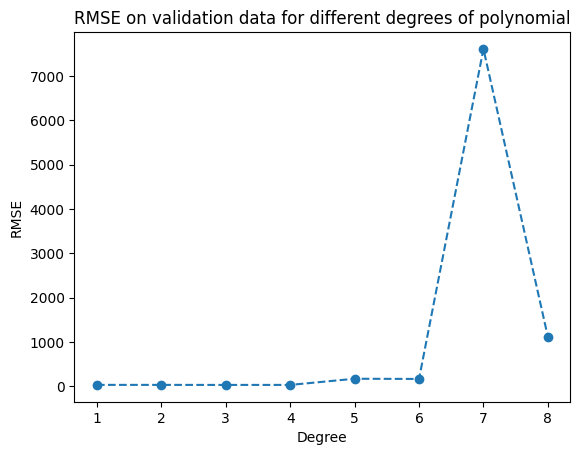

In [135]:
plt.plot(range(1,9), rmse_val[:9], "o--")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

In [127]:
from sklearn.linear_model import Ridge, LassoCV, ElasticNetCV

In [128]:
model_polynomial = PolynomialFeatures(degree=4, include_bias=False)
polynomial_features = model_polynomial.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.2)

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [130]:
ridge = Ridge(alpha=0.01)
ridge.fit(scaled_X_train, y_train)
ridge.score(scaled_X_train, y_train), ridge.score(scaled_X_test, y_test)


(0.9999999904692952, 0.9999999852252726)

In [131]:
lassocv = LassoCV(n_alphas=300, cv=5)
lassocv.fit(scaled_X_train,y_train)
lassocv.score(scaled_X_train, y_train)

0.9999986689225004